# **FRA501-HW2-CHAPTER01 Report**
Authors
- 64340500035 Napassorn Techasombooranakit
- 64340500049 Wasupol Hengsritawat

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from normal_dist import normal_dist, decision_boundary

## **Chapter 1**

#### **MLE**
Consider the following very simple model for stock pricing. The price at the end of each day is the 
price of the previous day multiplied by a fixed, but unknown, rate of return, α, with some noise, w. For a
two-day period, we can observe the following sequence:

$$y_2 = αy_1 + w_1$$
$$y_1 = αy_0 + w_0$$

where the noises $w0$, $w1$ are iid with the distribution $N (0, σ^2)$, $y0 ∼ N (0, λ)$ is independent of the noise
sequence. $σ^2$ and $λ$ are known, while $α$ is unknown.

##### 1. Find the MLE of the rate of return, $α$, given the observed price at the end of each day $y_2$, $y_1$, $y_0$. In other words, compute for the value of $α$ that maximizes $p (y_2, y_1, y_0|α)$.Hint: This is a Markov process, e.g. $y_2$ is independent of $y_0$ given $y_1$. In general, a process is Markov if $p (y_n|y_{n−1}, y_{n−2}, ...) = p (y_n|y_{n−1})$.

From Markov's property, $y_{i-1}$ can be consider as an input for $y_i$ and $y_i$ will be independent of each other. The likelihood of hypothesis $α$ given data from each day can then be written as

$$\begin{align*} L(\alpha) &= p(y_0,y_1,...,y_n|\alpha) \\
                      &= p(y_0)\prod_{i=1}^np(y_i|y_{i-1},\alpha) \\
                      &= \frac{1}{\sqrt{2\pi\lambda}}e^{-\frac{y_0^2}{2\lambda}}\prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-ay_{i-1})^2}{2\sigma^2}}.
\end{align*}$$

To determine the log likelihood and eliminate the exponential terms,

$$\begin{align*} l(\alpha) &= log(L(\alpha)) \\
                      &= log\left(\frac{1}{\sqrt{2\pi\lambda}}\right)-\frac{y_0^2}{2\lambda}+\sum_{i=1}^n\left[log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{1}{2}\left(\frac{y_i-\alpha y_{i-1}}{\sigma}\right)^2\right] \\
                      &= log\left(\frac{1}{\sqrt{2\pi\lambda}}\right)-\frac{y_0^2}{2\lambda}+nlog\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{1}{2}\sum_{i=1}^n\left(\frac{y_i-\alpha y_{i-1}}{\sigma}\right)^2. \\
\end{align*}$$

The maximum likelihood of hypothesis $α$ given data from each day is obtained by solving $\frac{\partial l(\alpha)}{\partial \alpha} = 0: $

$$\begin{align*} \frac{\partial l(\alpha)}{\partial \alpha} &= \frac{1}{\sigma^2}\sum_{i=1}^n(y_i-\alpha y_{i-1})(y_{i-1}) \\
                                                          0 &= \sum_{i=1}^n(y_i-\alpha y_{i-1})(y_{i-1}) \\
                                                          0 &= \sum_{i=1}^ny_{i-1}y_i-\alpha \sum_{i=1}^ny_{i-1}^2 \\
                                                     \alpha &= \frac{\sum_{i=1}^ny_{i-1}y_i}{\sum_{i=1}^ny_{i-1}^2}.
\end{align*}$$

Hence, the rate of return $\alpha$ which satisfy the MLE given the observed price at the end of each day $y_2$, $y_1$, $y_0$, can be obtained by substitutes n = 2 as
$$\alpha = \frac{y_0y_1+y_1y_2}{y_0^2+y_1^2}.$$

#### **Simple Bayes Classifier**

A student in Pattern Recognition course had finally built the ultimate classifier for cat emotions.
He used one input features: the amount of food the cat ate that day, $x$. He proposed the following
likelihood probabilities for class 1 (happy cat) and 2 (sad cat)
$$P(x|w1) = N(5, 2)$$
$$P(x|w2) = N(0, 2)$$

##### 2. Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities. What happen with $x < 2$ (Happy cat or Sad Cat)


The decision boundary of likelihood ratio test classifier can be determined by solving for $x_{bound}$ that satisfies $p(\omega_1|x_{bound}) = p(\omega_2|x_{bound})$:

 $$\begin{align*} 

           p(\omega_1|x_{bound}) &= p(\omega_2|x_{bound}) \\
p(x_{bound}|\omega_1)p(\omega_1) &= p(x_{bound}|\omega_2)p(\omega_2). \\

\end{align*}$$

Given the assumsion that $p(x|\omega_1)$, and $p(x|\omega_2)$ follow normal distributions and letting $r = \frac{p(\omega_2)}{p(\omega_1)}$, the equation can be rewritten as

 $$\begin{align*} 

p(x_{bound}|\omega_1) &= rp(x_{bound}|\omega_2). \\
\frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{(x_{bound} - \mu_1)^2}{2\sigma_1^2}} &= \frac{r}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{(x_{bound} - \mu_2)^2}{2\sigma_2^2}} \\
-\frac{1}{2}ln(\sigma_1^2)-\frac{(x_{bound} - \mu_1)^2}{2\sigma_1^2} &= -\frac{1}{2}ln(\frac{\sigma_2^2}{r^2})-\frac{(x_{bound} - \mu_2)^2}{2\sigma_2^2}, \\

\end{align*}$$

which can be written as quadratic equation as 

$$(\sigma_2^2-\sigma_1^2)x_{bound}^2+2(\mu_2\sigma_1^2-\mu_1\sigma_2^2)x_{bound}+\mu_1^2\sigma_2^2-\mu_2^2\sigma_1^2-\sigma_1^2\sigma_2^2ln\left(\frac{\sigma_2^2}{r^2\sigma_1^2}\right)=0.$$

Hence, in the case where $\sigma_2^2\neq\sigma_1^2$, the decision boundary can be expressed as follows:
$$ x_{bound} = \frac{\mu_1\sigma_2^2-\mu_2\sigma_1^2\pm\sqrt{\left[\mu_1^2+\mu_2^2+(\sigma_2^2-\sigma_1^2)ln\left(\frac{\sigma_2^2}{r^2\sigma_1^2}\right)-2\mu_1\mu_2\right]\sigma_1^2\sigma_2^2}}{\sigma_2^2-\sigma_1^2},$$

and in the case where $\sigma_2^2=\sigma_1^2$ as follows:
$$ x_{bound} = \frac{\mu_2^2-\mu_1^2-2\sigma_1^2ln(r)}{2(\mu_2-\mu_1)}.$$


Assuming equal prior probabilities, the posterior probabilities and the decision boundary of this classifier are shown below.

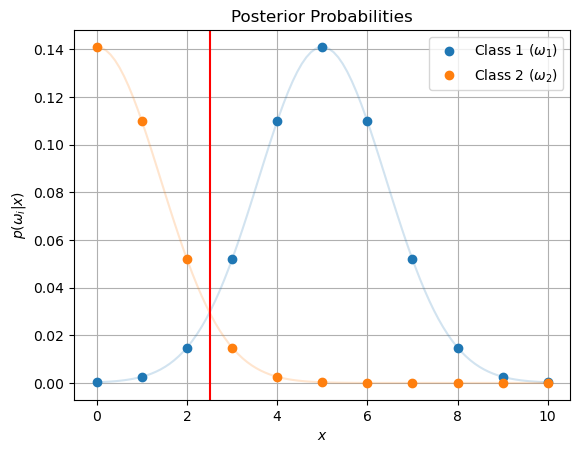

Decision boundary = 2.5


In [4]:
# -- |Define the likelihood| --
w1 = normal_dist(5,2)   # Happy cat - class 1
w2 = normal_dist(0,2)   # Sad cat - class 2

# -- |Define the priors| --
class1_prior = 0.5
class2_prior = 1 - class1_prior

# -- |Domain of evidence| --
x = np.linspace(0,10,num=11)

# -- |Display| --
# Plot the continuous trend
x_con = np.linspace(0,10,num=100)
plt.plot(x_con,class1_prior*w1.get_p(x_con),color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],alpha = 0.2,label='_Hidden')
plt.plot(x_con,class2_prior*w2.get_p(x_con),color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],alpha = 0.2,label='_Hidden')

# Plot the posterior probabilities
plt.plot(x,class1_prior*w1.get_p(x),'o', label='Class 1 ($\omega_1$)')
plt.plot(x,class2_prior*w2.get_p(x),'o', label='Class 2 ($\omega_2$)')

# Plot the decision boundary
plt.axvline(decision_boundary(w1,w2,class2_prior/class1_prior),color = 'red')

# Display configuration
plt.title('Posterior Probabilities')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(\omega_i|x)$')
plt.grid(True)
plt.show()

# Decision boundary value
print('Decision boundary =',decision_boundary(w1,w2,class2_prior/class1_prior))

It is clear that if $x<2$, the cat will likely to be sad.

##### 3. What happen to the decision boundary if the cat is happy with a prior of 0.8? Plot the posteriors values of the two classes on the same axis. What happen with $x < 2$ (Happy cat or Sad Cat)

Given the prior of the happy cat equals to 0.8, the posterior probabilities and the decision boundary of this classifier are shown below.

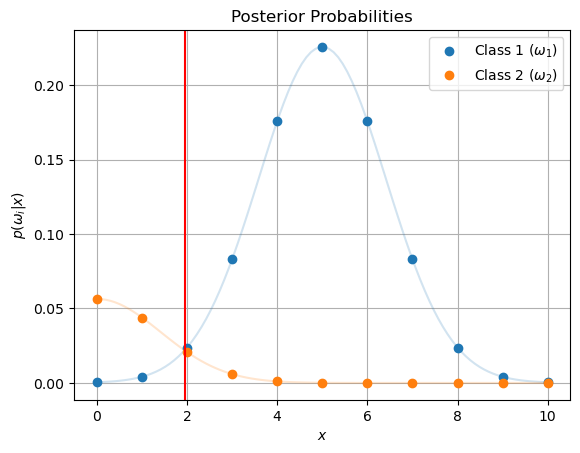

Decision boundary = 1.9454822555520437


In [6]:
# -- |Define the likelihood| --
w1 = normal_dist(5,2)   # Happy cat - class 1
w2 = normal_dist(0,2)   # Sad cat - class 2

# -- |Define the priors| --
class1_prior = 0.8
class2_prior = 1 - class1_prior

# -- |Domain of evidence| --
x = np.linspace(0,10,num=11)

# -- |Display| --
# Plot the continuous trend
x_con = np.linspace(0,10,num=100)
plt.plot(x_con,class1_prior*w1.get_p(x_con),color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],alpha = 0.2,label='_Hidden')
plt.plot(x_con,class2_prior*w2.get_p(x_con),color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],alpha = 0.2,label='_Hidden')

# Plot the posterior probabilities
plt.plot(x,class1_prior*w1.get_p(x),'o', label='Class 1 ($\omega_1$)')
plt.plot(x,class2_prior*w2.get_p(x),'o', label='Class 2 ($\omega_2$)')

# Plot the decision boundary
plt.axvline(decision_boundary(w1,w2,class2_prior/class1_prior),color = 'red')

# Display configuration
plt.title('Posterior Probabilities')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(\omega_i|x)$')
plt.grid(True)
plt.show()

# Decision boundary value
print('Decision boundary =',decision_boundary(w1,w2,class2_prior/class1_prior))

The new decision boundary has significantly shifted to the left since the given prior increases the posterior probability of class 1, which has a greater mean than class 2, and also decreases the posterior probability of class 2.

Similar to the outcome in section 2, the cat will likely to be sad if its owner feeds it with less than 2 units of food, but with a lower probability compared to the results from section 2. This is because the newly given prior knowledge [$p(\omega_1) = 0.8$] suggests that, in general, cats are more likely to be happy than what was indicated by the former prior [$p(\omega_1) = 0.5$].

### **Video for normal distribution**

https://www.desmos.com/calculator/pcagjbaat9?lang=th